In [1]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import wordcloud
import nltk 
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kenma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
#Set Seaborn
sns.set()

In [5]:
#Reading in data and data transformation 
df = pd.read_csv("AllProductReviews.csv")
df = df.rename(columns = {"ReviewBody":"body", "ReviewTitle":"title", "ReviewStar":"stars","Product":"earphone"})
df["description"] = df["body"] + df["title"]
df["text_length"] = df["description"].apply(lambda x: len(x))

In [6]:
#Check data length, values and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14337 non-null  object
 1   body         14337 non-null  object
 2   stars        14337 non-null  int64 
 3   earphone     14337 non-null  object
 4   description  14337 non-null  object
 5   text_length  14337 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 672.2+ KB


In [7]:
#Explore first 20 rows of data
df.head(20)

,title,body,stars,earphone,description,text_length
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,No doubt it has a great bass and to a great ex...,479
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,"This earphones are unreliable, i bought it be...",407
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,"i bought itfor 999,I purchased it second time,...",509
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,Its sound quality is adorable. overall it was ...,231
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,Its Awesome... Good sound quality & 8-9 hrs ba...,282
5,Charging port not working\n,"After 11 days, the charging port isn't working...",1,boAt Rockerz 255,"After 11 days, the charging port isn't working...",217
6,Loved the color and sound !!\n,Sound-4.5/5Build quality-4.5/5Battery life -4/...,4,boAt Rockerz 255,Sound-4.5/5Build quality-4.5/5Battery life -4/...,504
7,Great sound with worst mic.\n,After one month usage reviewing this .Pros-1- ...,3,boAt Rockerz 255,After one month usage reviewing this .Pros-1- ...,198
8,Battery life is good enough to keep going all ...,I can’t get enough of this earphone! The bass ...,5,boAt Rockerz 255,I can’t get enough of this earphone! The bass ...,445
9,Very very bad Durabity\n,The product durability is 1 month..I just lost...,1,boAt Rockerz 255,The product durability is 1 month..I just lost...,381


[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Stars')]

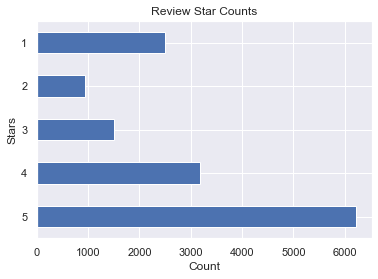

In [8]:
#Get value counts for star ratings 
plt1 = df['stars'].value_counts().sort_index(ascending=False).plot(kind = 'barh')
plt1.set_title('Review Star Counts')
plt1.set(xlabel='Count', ylabel = 'Stars')

Text(0.5, 1.0, 'Text Length vs. Stars')

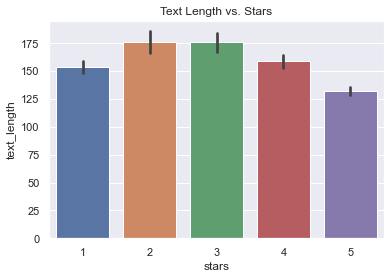

In [9]:
#Plot for review text length vs. stars in review
plt2 = sns.barplot(x=df['stars'], y=df['text_length'])
plt2.set_title('Text Length vs. Stars')

Text(0.5, 1.0, 'Earphones vs. Average Rating')

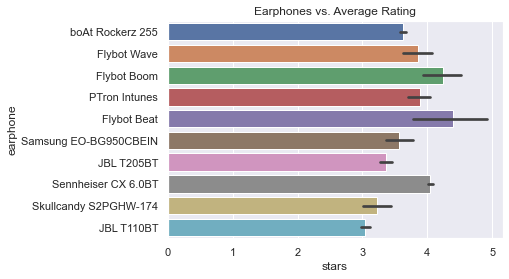

In [10]:
#Plot earphones vs. review counts 
plt3 = sns.barplot(x=df['stars'], y=df['earphone'])
plt3.set_title('Earphones vs. Average Rating')

Text(0.5, 1.0, 'Earphones vs. Stars & Text Length')

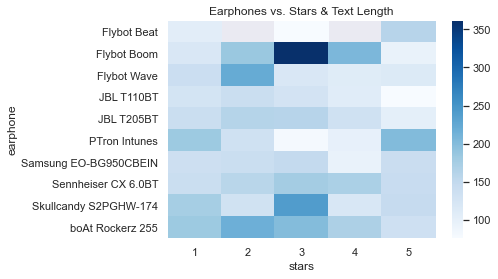

In [11]:
#Heatmap comparing reviews with text length and stars 
plt4_df = df[['earphone', 'stars', 'text_length']]
plt4_data = pd.pivot_table(plt4_df, values = 'text_length', index = ['earphone'], columns = 'stars')
plt4 = sns.heatmap(plt4_data, cmap = 'Blues') 
plt4.set_title('Earphones vs. Stars & Text Length')

In [12]:
#Creating sentiment analysis scores from Vader 
sid = SentimentIntensityAnalyzer() 
df['scores'] = df['description'].apply(lambda x: sid.polarity_scores(x))
df['compound']  = df['scores'].apply(lambda x: x['compound'])
df['comp_score'] = df['compound'].apply(lambda x: 'pos' if x >=0 else 'neg')
df['review_score'] = df['stars'].apply(lambda x: 'pos' if x >=4 else 'neg')

In [13]:
#Calculating accuracy of Vader positive/negative classification 
accuracy_score(df['comp_score'],df['review_score'])

0.8315547185603683

In [14]:
print(classification_report(df['comp_score'],df['review_score']))

              precision    recall  f1-score   support

         neg       0.62      0.85      0.72      3612
         pos       0.94      0.83      0.88     10725

    accuracy                           0.83     14337
   macro avg       0.78      0.84      0.80     14337
weighted avg       0.86      0.83      0.84     14337



In [15]:
df['negative']  = df['scores'].apply(lambda score_dict: score_dict['neg'])
df['neutral']  = df['scores'].apply(lambda score_dict: score_dict['neu'])
df['positive']  = df['scores'].apply(lambda score_dict: score_dict['pos'])

Text(0.5, 0.98, 'Stars vs. Text Sentiment')

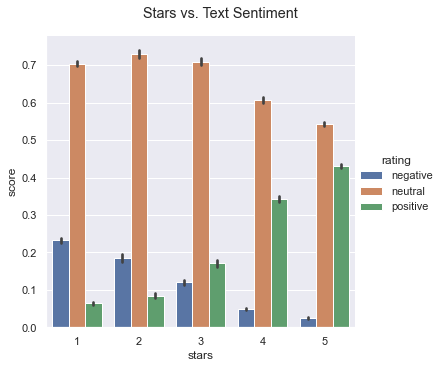

In [16]:
#Stars vs. Text Sentiment Ratings 
plt5_df = pd.melt(df[['stars', 'negative', 'neutral', 'positive']], id_vars = "stars", var_name = "rating", value_name = "score")
plt5 = sns.catplot(x='stars', y = 'score', hue = 'rating', data = plt5_df, kind = 'bar')
plt5.fig.subplots_adjust(top=0.9)
plt5.fig.suptitle('Stars vs. Text Sentiment')

In [17]:
df['earphone_id'] = df['earphone'].apply(lambda c: str(hash(c)))

In [18]:
earphone_dict = pd.Series(df['earphone'].values, index = df['earphone_id']).to_dict()

In [19]:
earphone_dict

{'1276990541662979173': 'boAt Rockerz 255',
 '5848793224119208100': 'Flybot Wave',
 '-8693671856494775507': 'Flybot Boom',
 '1480969147858709423': 'PTron Intunes',
 '3189089981926891343': 'Flybot Beat',
 '9069679449116119755': 'Samsung EO-BG950CBEIN',
 '-1004008775225928241': 'JBL T205BT',
 '-8084102898545224577': 'Sennheiser CX 6.0BT',
 '-179537299289337337': 'Skullcandy S2PGHW-174',
 '9006971826554272965': 'JBL T110BT'}

In [36]:
#Random Forest Regressor star prediction 
X = df[['earphone_id', 'compound', 'negative', 'neutral', 'positive','text_length']]
y = df['stars']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.5118549511854951

In [40]:
#The parameter lists were adjusted after a few iterations. 
n_estimators = [1400, 1500, 1600, 1700, 1800]
max_features = ['auto', 'sqrt']
max_depth = [6, 8, 10, 12]
max_depth.append(None)
min_samples_split = [2, 3, 4]
min_samples_leaf = [2, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [42]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [6, 8, 10, 12, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [1400, 1500, 1600, 1700,
                                                         1800]},
                   random_state=42, verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 6,
 'bootstrap': False}

In [44]:
y_pred = rf_random.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.5543933054393305